In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error as MSE
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('Sales.xlsx',sheet_name='Sales')

In [3]:
df.head(5)

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [4]:
df.shape

(4520, 20)

In [5]:
df.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [6]:
df.dtypes

CustID                    int64
AgentBonus                int64
Age                     float64
CustTenure              float64
Channel                  object
Occupation               object
EducationField           object
Gender                   object
ExistingProdType          int64
Designation              object
NumberOfPolicy          float64
MaritalStatus            object
MonthlyIncome           float64
Complaint                 int64
ExistingPolicyTenure    float64
SumAssured              float64
Zone                     object
PaymentMethod            object
LastMonthCalls            int64
CustCareScore           float64
dtype: object

In [7]:
df.isnull().sum().sum()

1166

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,4520.0,7.002260e+06,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,4.077838e+03,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,1.449471e+01,9.037629,2.0,7.00,13.0,20.00,58.0
CustTenure,4294.0,1.446903e+01,8.963671,2.0,7.00,13.0,20.00,57.0
ExistingProdType,4520.0,3.688938e+00,1.015769,1.0,3.00,4.0,4.00,6.0
NumberOfPolicy,4475.0,3.565363e+00,1.455926,1.0,2.00,4.0,5.00,6.0
MonthlyIncome,4284.0,2.289031e+04,4885.600757,16009.0,19683.50,21606.0,24725.00,38456.0
Complaint,4520.0,2.871681e-01,0.452491,0.0,0.00,0.0,1.00,1.0
ExistingPolicyTenure,4336.0,4.130074e+00,3.346386,1.0,2.00,3.0,6.00,25.0
SumAssured,4366.0,6.199997e+05,246234.822140,168536.0,439443.25,578976.5,758236.00,1838496.0


In [10]:
df['Age'].isnull().sum().sum()

269

In [11]:
df['Channel'].unique()

array(['Agent', 'Third Party Partner', 'Online'], dtype=object)

In [12]:
df['Gender'].unique()

array(['Female', 'Male', 'Fe male'], dtype=object)

In [13]:
df['Gender'].replace(to_replace='Fe male',value='Female',inplace=True)

In [14]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
df['Occupation'].unique()

array(['Salaried', 'Free Lancer', 'Small Business', 'Laarge Business',
       'Large Business'], dtype=object)

In [16]:
df['Occupation'].replace(to_replace='Laarge Business',value='Large Business',inplace=True)

In [17]:
df['Occupation'].unique()

array(['Salaried', 'Free Lancer', 'Small Business', 'Large Business'],
      dtype=object)

In [18]:
df['Designation'].unique()

array(['Manager', 'Exe', 'Executive', 'VP', 'AVP', 'Senior Manager'],
      dtype=object)

In [19]:
df['Designation'].replace(to_replace='Exe',value='Executive',inplace=True)

In [20]:
df['Designation'].unique()

array(['Manager', 'Executive', 'VP', 'AVP', 'Senior Manager'],
      dtype=object)

In [21]:
df['EducationField'].unique()

array(['Graduate', 'Post Graduate', 'UG', 'Under Graduate', 'Engineer',
       'Diploma', 'MBA'], dtype=object)

In [22]:
df['EducationField'].replace(to_replace=('Graduate','Under Graduate'),value='UG',inplace=True)

In [23]:
df['EducationField'].unique()

array(['UG', 'Post Graduate', 'Engineer', 'Diploma', 'MBA'], dtype=object)

In [24]:
df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Unmarried', 'Married'], dtype=object)

In [25]:
df['Zone'].unique()

array(['North', 'West', 'East', 'South'], dtype=object)

In [26]:
df['PaymentMethod'].unique()

array(['Half Yearly', 'Yearly', 'Quarterly', 'Monthly'], dtype=object)

In [27]:
df['Complaint'].unique()

array([1, 0], dtype=int64)

In [28]:
df['Complaint'].replace(to_replace=('1','0'),value=('True','False'),inplace=True)

In [29]:
df['Complaint'].unique()

array([1, 0], dtype=int64)

In [30]:
df['MonthlyIncome'].describe()

count     4284.000000
mean     22890.309991
std       4885.600757
min      16009.000000
25%      19683.500000
50%      21606.000000
75%      24725.000000
max      38456.000000
Name: MonthlyIncome, dtype: float64

In [31]:
df['SumAssured'].describe()

count    4.366000e+03
mean     6.199997e+05
std      2.462348e+05
min      1.685360e+05
25%      4.394432e+05
50%      5.789765e+05
75%      7.582360e+05
max      1.838496e+06
Name: SumAssured, dtype: float64

In [32]:
df['Income Range']=pd.cut(df['MonthlyIncome'],[15000,20000,25000,30000,35000,40000],labels=['15k-20k','20k-25k','25k-30k','30k-35k','35k-40k'])

In [33]:
df['Income Range']

0       20k-25k
1       20k-25k
2       15k-20k
3       15k-20k
4       15k-20k
         ...   
4515    25k-30k
4516    20k-25k
4517        NaN
4518    20k-25k
4519    20k-25k
Name: Income Range, Length: 4520, dtype: category
Categories (5, object): ['15k-20k' < '20k-25k' < '25k-30k' < '30k-35k' < '35k-40k']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CustID                4520 non-null   int64   
 1   AgentBonus            4520 non-null   int64   
 2   Age                   4251 non-null   float64 
 3   CustTenure            4294 non-null   float64 
 4   Channel               4520 non-null   object  
 5   Occupation            4520 non-null   object  
 6   EducationField        4520 non-null   object  
 7   Gender                4520 non-null   object  
 8   ExistingProdType      4520 non-null   int64   
 9   Designation           4520 non-null   object  
 10  NumberOfPolicy        4475 non-null   float64 
 11  MaritalStatus         4520 non-null   object  
 12  MonthlyIncome         4284 non-null   float64 
 13  Complaint             4520 non-null   int64   
 14  ExistingPolicyTenure  4336 non-null   float64 
 15  SumA

In [35]:
#checking nulls
df.isnull().sum()[df.isnull().sum()>0]

Age                     269
CustTenure              226
NumberOfPolicy           45
MonthlyIncome           236
ExistingPolicyTenure    184
SumAssured              154
CustCareScore            52
Income Range            236
dtype: int64

In [36]:
median1=df["Age"].median()
median2=df["CustTenure"].median()
median3=df["MonthlyIncome"].median()
median4=df["SumAssured"].median()


df["Age"].replace(np.nan,median1,inplace=True)
df["CustTenure"].replace(np.nan,median2,inplace=True)
df["MonthlyIncome"].replace(np.nan,median3,inplace=True)
df["SumAssured"].replace(np.nan,median4,inplace=True)

In [37]:
mode1=df["NumberOfPolicy"].mode().values[0]
mode2=df["ExistingPolicyTenure"].mode().values[0]
mode3=df["CustCareScore"].mode().values[0]



df["NumberOfPolicy"].replace(np.nan,mode1,inplace=True)
df["ExistingPolicyTenure"].replace(np.nan,mode2,inplace=True)
df["CustCareScore"].replace(np.nan,mode3,inplace=True)


In [38]:
df['ExistingProdType'].unique()

array([3, 4, 2, 5, 1, 6], dtype=int64)

In [39]:
df['NumberOfPolicy'].unique()

array([2., 4., 3., 5., 1., 6.])

In [40]:
df['NumberOfPolicy'].unique()

array([2., 4., 3., 5., 1., 6.])

In [41]:
df.duplicated().sum()

0

In [42]:
pd.crosstab(df['Gender'],df['NumberOfPolicy'])

NumberOfPolicy,1.0,2.0,3.0,4.0,5.0,6.0
Gender,,,,,,
Female,162,263,383,474,364,186
Male,276,448,556,665,492,251


In [43]:
pd.crosstab(df['Income Range'],df['NumberOfPolicy'])

NumberOfPolicy,1.0,2.0,3.0,4.0,5.0,6.0
Income Range,,,,,,
15k-20k,219,139,362,233,221,3
20k-25k,141,377,356,563,411,278
25k-30k,40,108,118,140,109,82
30k-35k,19,19,49,81,24,3
35k-40k,0,32,22,58,35,42


In [44]:
pd.crosstab(df['Occupation'],df['NumberOfPolicy'])

NumberOfPolicy,1.0,2.0,3.0,4.0,5.0,6.0
Occupation,,,,,,
Free Lancer,0,0,1,1,0,0
Large Business,35,60,85,104,84,40
Salaried,224,370,465,535,395,203
Small Business,179,281,388,499,377,194


In [45]:
pd.crosstab(df['EducationField'],df['NumberOfPolicy'])

NumberOfPolicy,1.0,2.0,3.0,4.0,5.0,6.0
EducationField,,,,,,
Diploma,49,78,81,122,115,51
Engineer,32,57,87,107,85,40
MBA,7,10,10,20,19,8
Post Graduate,26,43,53,61,47,22
UG,324,523,708,829,590,316


In [46]:
pd.crosstab(df['PaymentMethod'],df['NumberOfPolicy'])

NumberOfPolicy,1.0,2.0,3.0,4.0,5.0,6.0
PaymentMethod,,,,,,
Half Yearly,268,423,548,675,493,249
Monthly,37,53,67,85,71,41
Quarterly,0,13,21,15,17,10
Yearly,133,222,303,364,275,137


In [47]:
mean_agentbonus= df[['ExistingProdType','AgentBonus']].mean()
mean_agentbonus

ExistingProdType       3.688938
AgentBonus          4077.838274
dtype: float64

In [48]:
pd.crosstab(df['ExistingProdType'],df['Channel'],values=df['AgentBonus'],aggfunc='median')

Channel,Agent,Online,Third Party Partner
ExistingProdType,,,
1,3575.0,4647.5,3737.0
2,3950.0,4039.0,3859.0
3,3632.0,3648.0,3595.0
4,4061.5,4040.0,4023.5
5,4230.0,4037.0,3970.0
6,4555.5,3546.0,3897.5


In [49]:
pd.crosstab(df['PaymentMethod'],df['Channel'],values=df['AgentBonus'],aggfunc='median')

Channel,Agent,Online,Third Party Partner
PaymentMethod,,,
Half Yearly,3946.5,3980.0,3884.5
Monthly,3815.0,4546.0,3822.5
Quarterly,3473.0,3338.5,4008.5
Yearly,3926.0,3925.5,3777.5


In [50]:
No_of_policy_by_paymentmode=df.groupby(['PaymentMethod']).agg({'NumberOfPolicy':'count'})
No_of_policy_by_paymentmode

,NumberOfPolicy
PaymentMethod,
Half Yearly,2656
Monthly,354
Quarterly,76
Yearly,1434


In [51]:
No_of_policy_by_count=df.groupby(['NumberOfPolicy']).agg({'NumberOfPolicy':'count'})
No_of_policy_by_count

,NumberOfPolicy
NumberOfPolicy,
1.0,438
2.0,711
3.0,939
4.0,1139
5.0,856
6.0,437


In [52]:
df['Age'].describe()

count    4520.000000
mean       14.405752
std         8.771646
min         2.000000
25%         8.000000
50%        13.000000
75%        19.000000
max        58.000000
Name: Age, dtype: float64

In [53]:
df[df['Age']==2]

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,...,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Income Range
41,7000041,2405,2.0,2.0,Agent,Salaried,UG,Male,4,Executive,...,Divorced,17177.0,0,7.0,578976.5,North,Yearly,0,3.0,15k-20k
88,7000088,1878,2.0,2.0,Agent,Small Business,UG,Male,3,Executive,...,Divorced,17070.0,0,1.0,578976.5,North,Half Yearly,4,2.0,15k-20k
109,7000109,2499,2.0,5.0,Agent,Small Business,Diploma,Male,4,Manager,...,Single,20828.0,1,5.0,347411.0,West,Yearly,4,2.0,20k-25k
151,7000151,2470,2.0,7.0,Agent,Small Business,UG,Male,5,Manager,...,Divorced,22457.0,1,2.0,466881.0,West,Yearly,2,3.0,20k-25k
189,7000189,1882,2.0,4.0,Agent,Small Business,UG,Male,3,Executive,...,Married,18816.0,0,1.0,233318.0,West,Half Yearly,4,3.0,15k-20k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161,7004161,2016,2.0,10.0,Online,Small Business,UG,Male,4,Executive,...,Married,20163.0,0,1.0,387130.0,West,Half Yearly,1,1.0,20k-25k
4218,7004218,2470,2.0,10.0,Agent,Small Business,UG,Female,5,Manager,...,Single,24701.0,0,1.0,417447.0,North,Yearly,4,3.0,20k-25k
4233,7004233,2307,2.0,9.0,Agent,Small Business,UG,Male,4,Executive,...,Single,20976.0,0,5.0,408403.0,North,Half Yearly,10,5.0,20k-25k
4401,7004401,2493,2.0,10.0,Agent,Salaried,UG,Female,5,Manager,...,Married,24931.0,0,4.0,391417.0,West,Yearly,12,1.0,20k-25k


In [54]:
df[df['Age']==7]

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,...,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Income Range
5,7000005,3252,7.0,13.0,Third Party Partner,Salaried,UG,Male,3,Executive,...,Single,18068.0,0,2.0,487836.0,North,Half Yearly,6,5.0,15k-20k
15,7000015,3402,7.0,3.0,Agent,Large Business,Engineer,Male,3,Manager,...,Divorced,21261.0,0,5.0,547683.0,West,Half Yearly,7,2.0,20k-25k
23,7000023,3431,7.0,14.0,Third Party Partner,Small Business,UG,Female,3,Executive,...,Unmarried,17153.0,0,2.0,578976.5,North,Half Yearly,7,3.0,15k-20k
31,7000031,6576,7.0,26.0,Agent,Salaried,UG,Female,3,Senior Manager,...,Single,28591.0,1,16.0,749656.0,North,Half Yearly,0,2.0,25k-30k
38,7000038,6524,7.0,20.0,Third Party Partner,Salaried,Post Graduate,Male,3,Senior Manager,...,Married,27185.0,1,13.0,1246160.0,West,Half Yearly,7,3.0,25k-30k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4278,7004278,2297,7.0,9.0,Third Party Partner,Small Business,UG,Female,4,Executive,...,Single,20879.0,0,2.0,429481.0,West,Half Yearly,3,3.0,20k-25k
4287,7004287,6984,7.0,7.0,Agent,Small Business,Diploma,Male,4,VP,...,Married,36760.0,0,10.0,726378.0,West,Half Yearly,1,4.0,35k-40k
4300,7004300,3744,7.0,22.0,Online,Salaried,UG,Female,5,Executive,...,Single,20799.0,0,2.0,393101.0,West,Yearly,3,1.0,20k-25k
4398,7004398,3670,7.0,7.0,Agent,Small Business,UG,Female,4,Executive,...,Married,21588.0,0,7.0,477095.0,West,Half Yearly,9,3.0,20k-25k


In [55]:
df.shape

(4520, 21)

In [56]:
df.Designation.value_counts()

Executive         1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: Designation, dtype: int64

In [57]:
df.Gender.value_counts()

Male      2688
Female    1832
Name: Gender, dtype: int64

In [58]:
df.NumberOfPolicy.value_counts()

4.0    1139
3.0     939
5.0     856
2.0     711
1.0     438
6.0     437
Name: NumberOfPolicy, dtype: int64

In [59]:
categoriacl_features=[]
numerical_features=[]
for i in df.columns:
    if df[i].dtype=="object":
        categoriacl_features.append(i)
    else:
        numerical_features.append(i)
print(categoriacl_features) 
print(numerical_features)

['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'Zone', 'PaymentMethod']
['CustID', 'AgentBonus', 'Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy', 'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore', 'Income Range']


In [60]:
df.corr()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
CustID,1.000000,0.192393,0.093616,0.113619,0.419359,0.254446,0.295866,0.001921,0.115566,0.166158,0.122144,-0.034245
AgentBonus,0.192393,1.000000,0.552344,0.555791,0.113023,0.079266,0.566688,0.014281,0.312378,0.844920,0.199708,0.023192
Age,0.093616,0.552344,1.000000,0.323486,0.073452,0.046775,0.327965,0.020257,0.168933,0.466154,0.116929,0.034263
CustTenure,0.113619,0.555791,0.323486,1.000000,0.082784,0.048699,0.318427,0.004282,0.172745,0.468206,0.117702,0.011497
ExistingProdType,0.419359,0.113023,0.073452,0.082784,1.000000,0.149862,0.190571,-0.003486,0.064252,0.103697,0.033191,0.004110
NumberOfPolicy,0.254446,0.079266,0.046775,0.048699,0.149862,1.000000,0.133535,-0.016014,0.052743,0.063781,0.075138,-0.001005
MonthlyIncome,0.295866,0.566688,0.327965,0.318427,0.190571,0.133535,1.000000,-0.005197,0.084437,0.460657,0.337420,0.035621
Complaint,0.001921,0.014281,0.020257,0.004282,-0.003486,-0.016014,-0.005197,1.000000,0.003747,-0.000150,-0.026320,-0.003814
ExistingPolicyTenure,0.115566,0.312378,0.168933,0.172745,0.064252,0.052743,0.084437,0.003747,1.000000,0.270278,0.082497,-0.010027
SumAssured,0.166158,0.844920,0.466154,0.468206,0.103697,0.063781,0.460657,-0.000150,0.270278,1.000000,0.157970,0.003327


<AxesSubplot: >

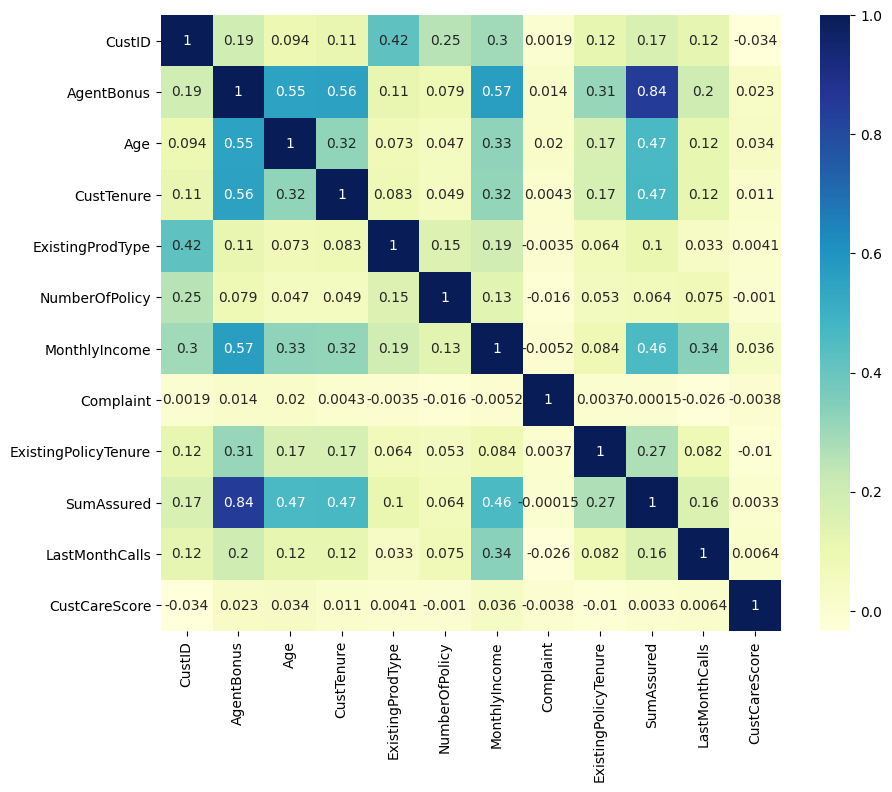

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),cmap="YlGnBu",annot=True)

<AxesSubplot: xlabel='Gender', ylabel='count'>

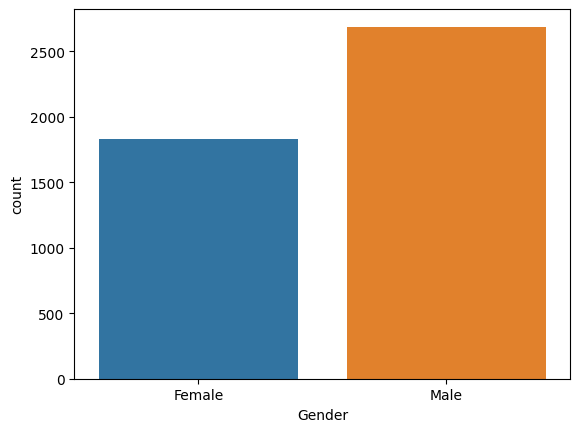

In [62]:
sns.countplot(df['Gender'])

<AxesSubplot: xlabel='Occupation', ylabel='count'>

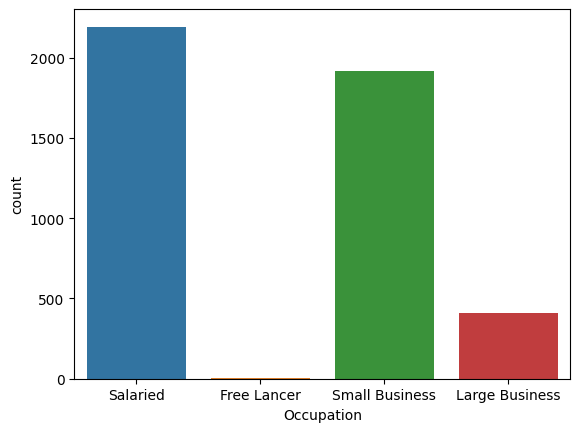

In [63]:
sns.countplot(df['Occupation'])

<AxesSubplot: xlabel='Designation', ylabel='count'>

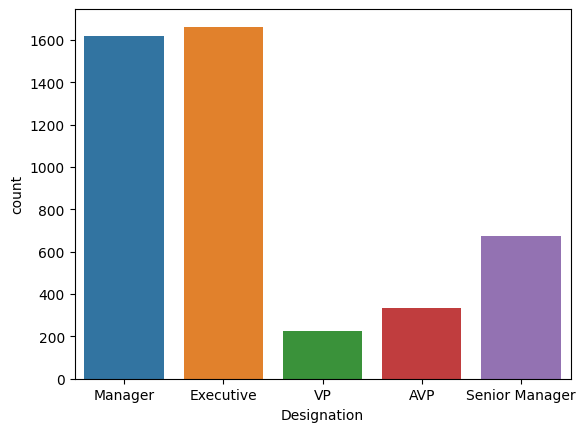

In [64]:
sns.countplot(df['Designation'])

<AxesSubplot: xlabel='ExistingProdType', ylabel='count'>

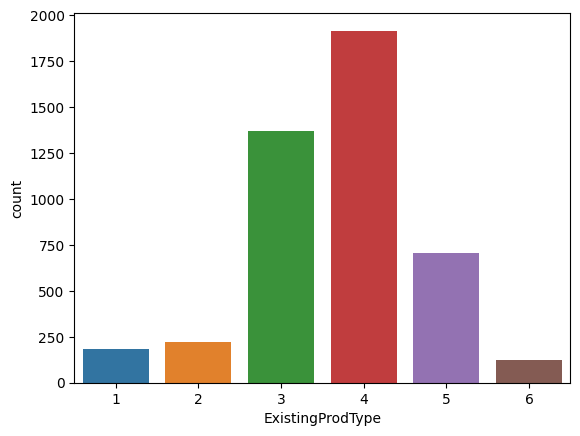

In [65]:
sns.countplot(df['ExistingProdType'])

<AxesSubplot: xlabel='NumberOfPolicy', ylabel='count'>

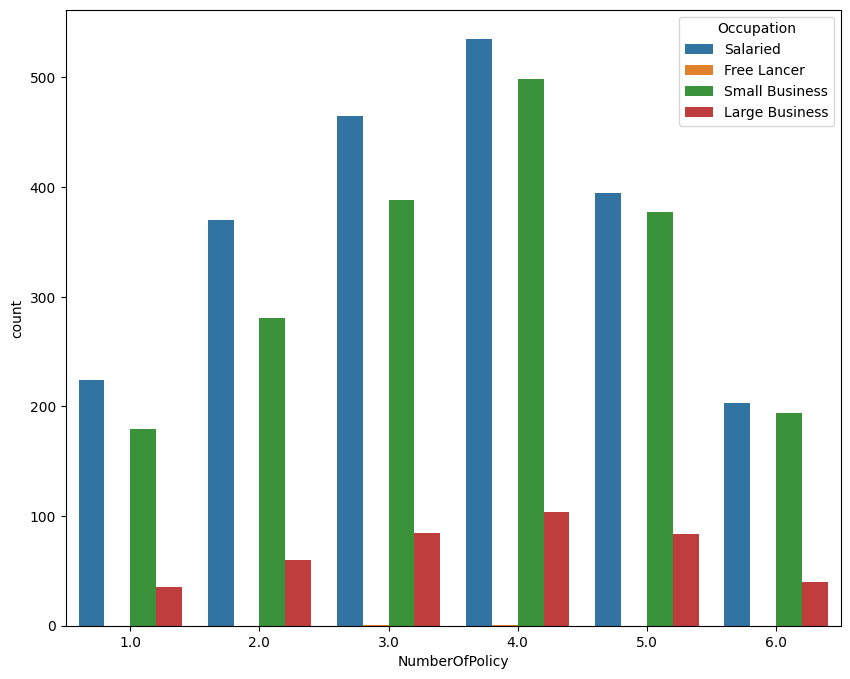

In [66]:
plt.figure(figsize=(10,8))
sns.countplot(df['NumberOfPolicy'],hue=df['Occupation'])

<AxesSubplot: xlabel='NumberOfPolicy', ylabel='Density'>

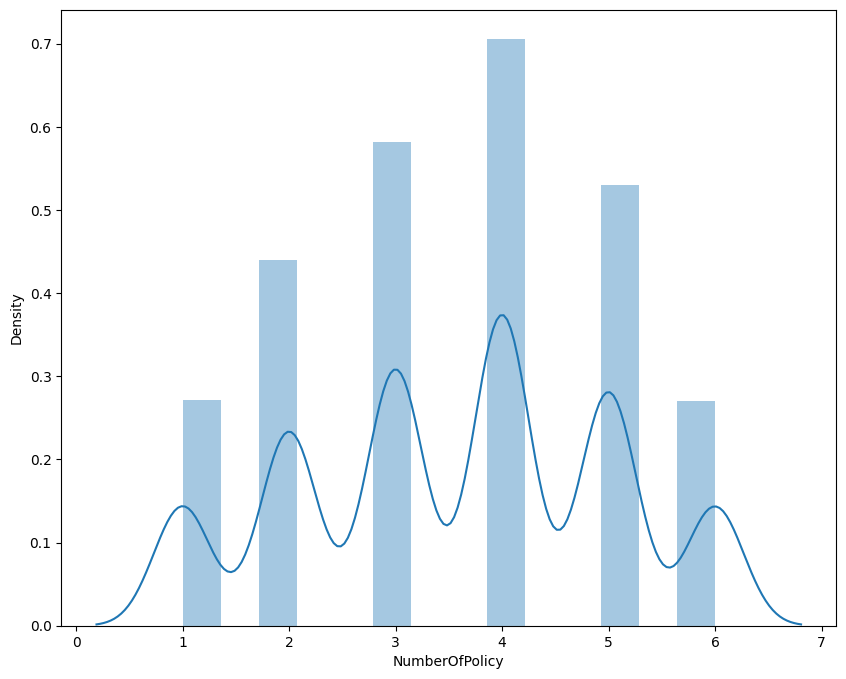

In [67]:
plt.figure(figsize=(10,8))
sns.distplot(df['NumberOfPolicy'])

<AxesSubplot: xlabel='MonthlyIncome', ylabel='Density'>

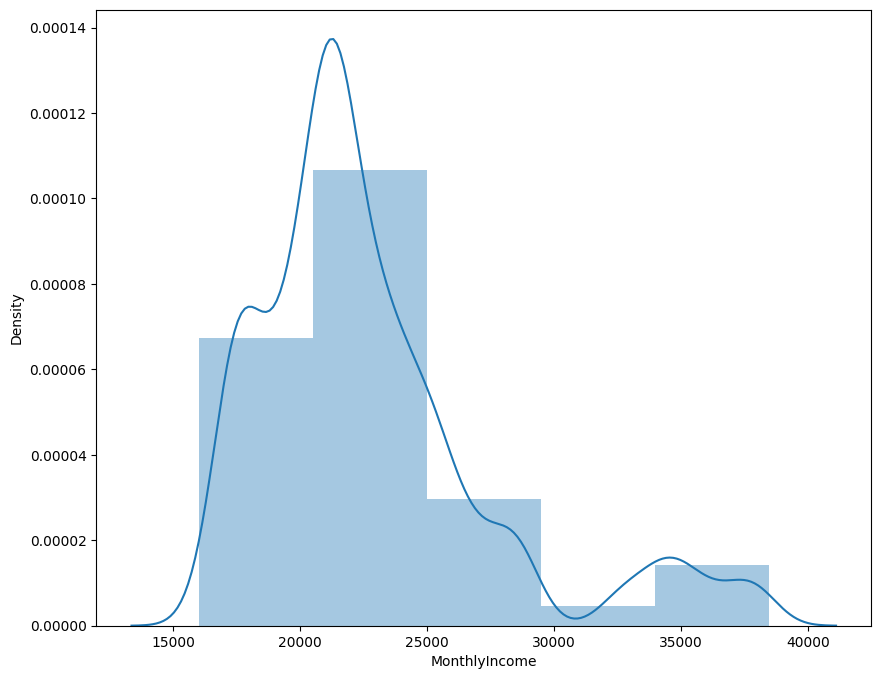

In [68]:
plt.figure(figsize=(10,8))
sns.distplot(df['MonthlyIncome'],bins=5)

<AxesSubplot: xlabel='SumAssured', ylabel='Density'>

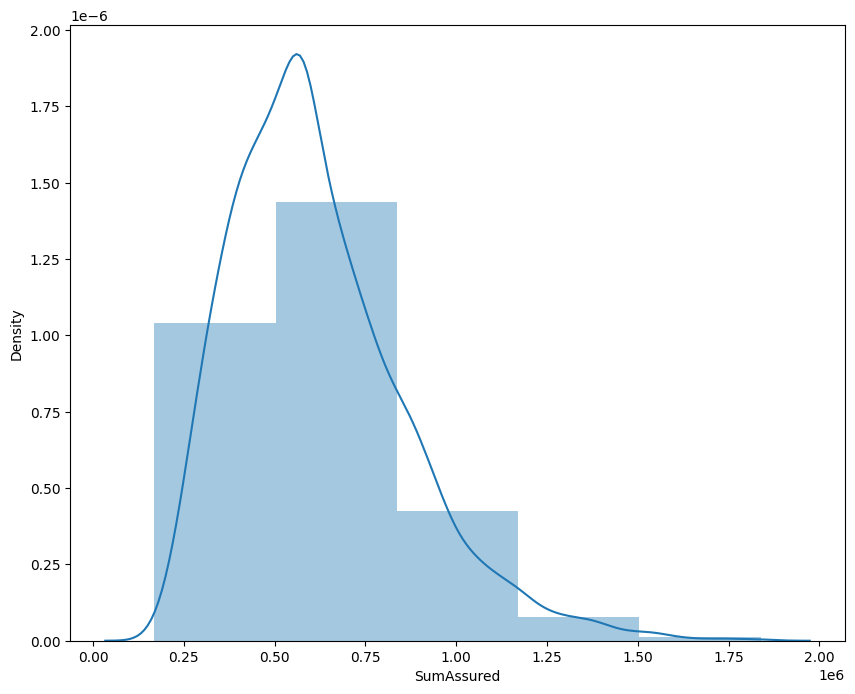

In [69]:
plt.figure(figsize=(10,8))
sns.distplot(df['SumAssured'],bins=5)

<AxesSubplot: >

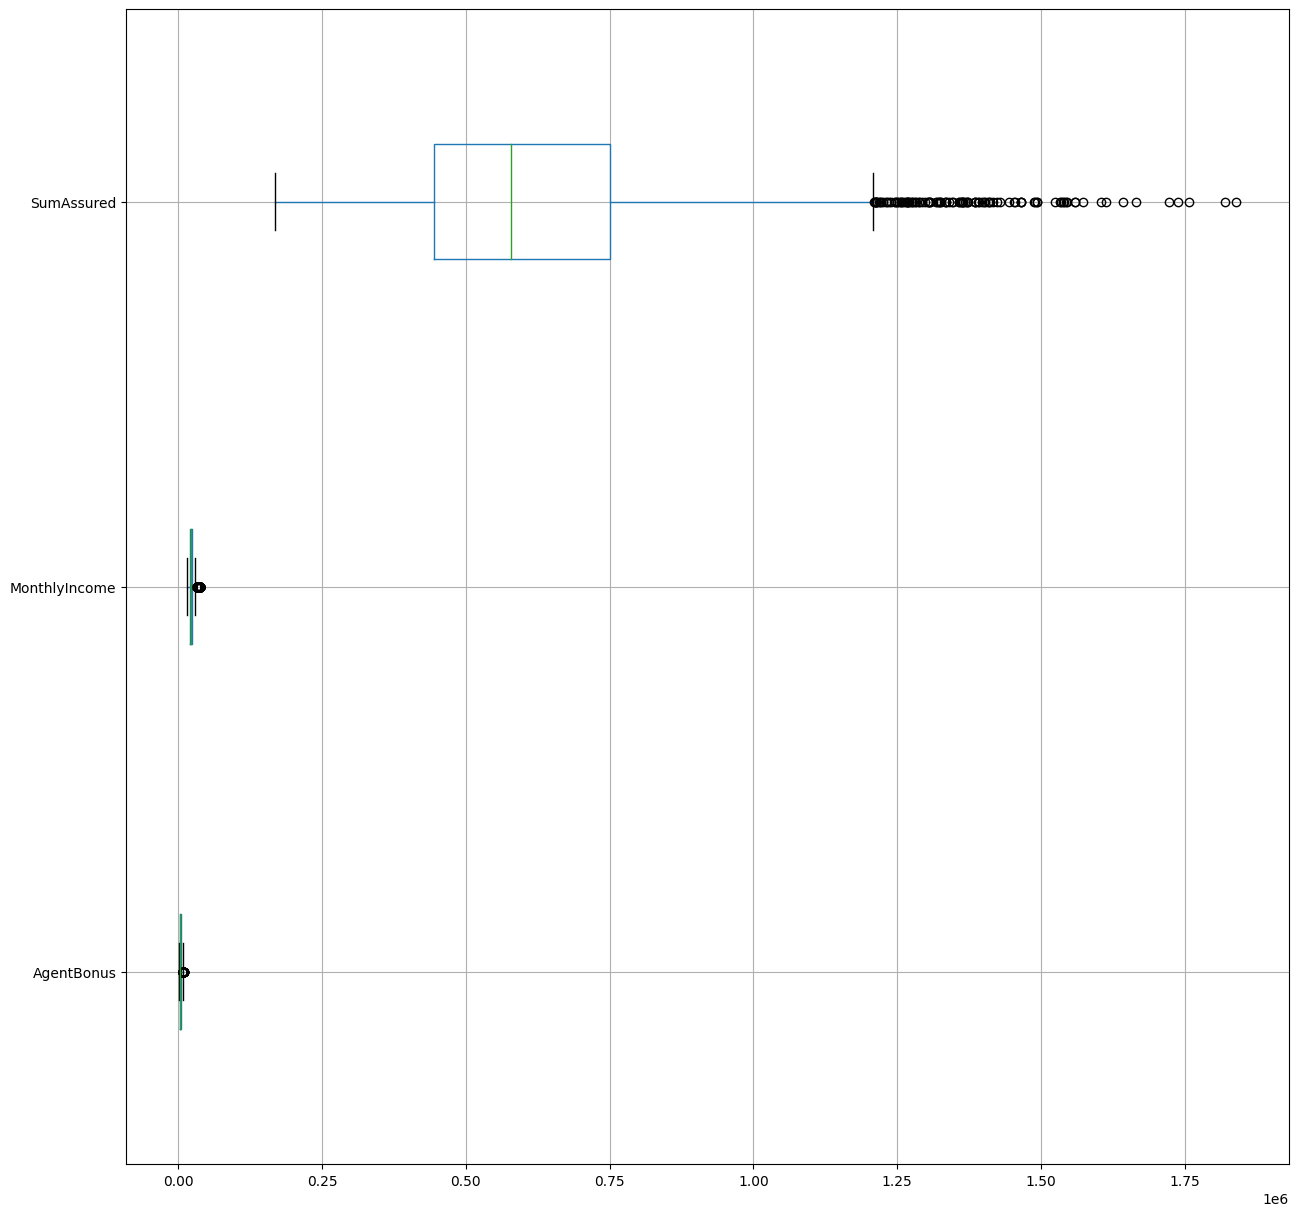

In [70]:
#finding outliers
plt.figure(figsize=(15,15))
df[['AgentBonus', 'MonthlyIncome', 'SumAssured',]].boxplot(vert=0)

In [71]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [72]:
lrextra,urextra=remove_outlier(df['AgentBonus'])
df['AgentBonus']=np.where(df['AgentBonus']>urextra,urextra,df['AgentBonus'])
df['AgentBonus']=np.where(df['AgentBonus']<lrextra,lrextra,df['AgentBonus'])

lrextra1,urextra1=remove_outlier(df['MonthlyIncome'])
df['MonthlyIncome']=np.where(df['MonthlyIncome']>urextra1,urextra1,df['MonthlyIncome'])
df['MonthlyIncome']=np.where(df['MonthlyIncome']<lrextra1,lrextra1,df['MonthlyIncome'])

lrmaxrun,urmaxrun=remove_outlier(df['SumAssured'])
df['SumAssured']=np.where(df['SumAssured']>urmaxrun,urmaxrun,df['SumAssured'])
df['SumAssured']=np.where(df['SumAssured']<lrmaxrun,lrmaxrun,df['SumAssured'])

<AxesSubplot: >

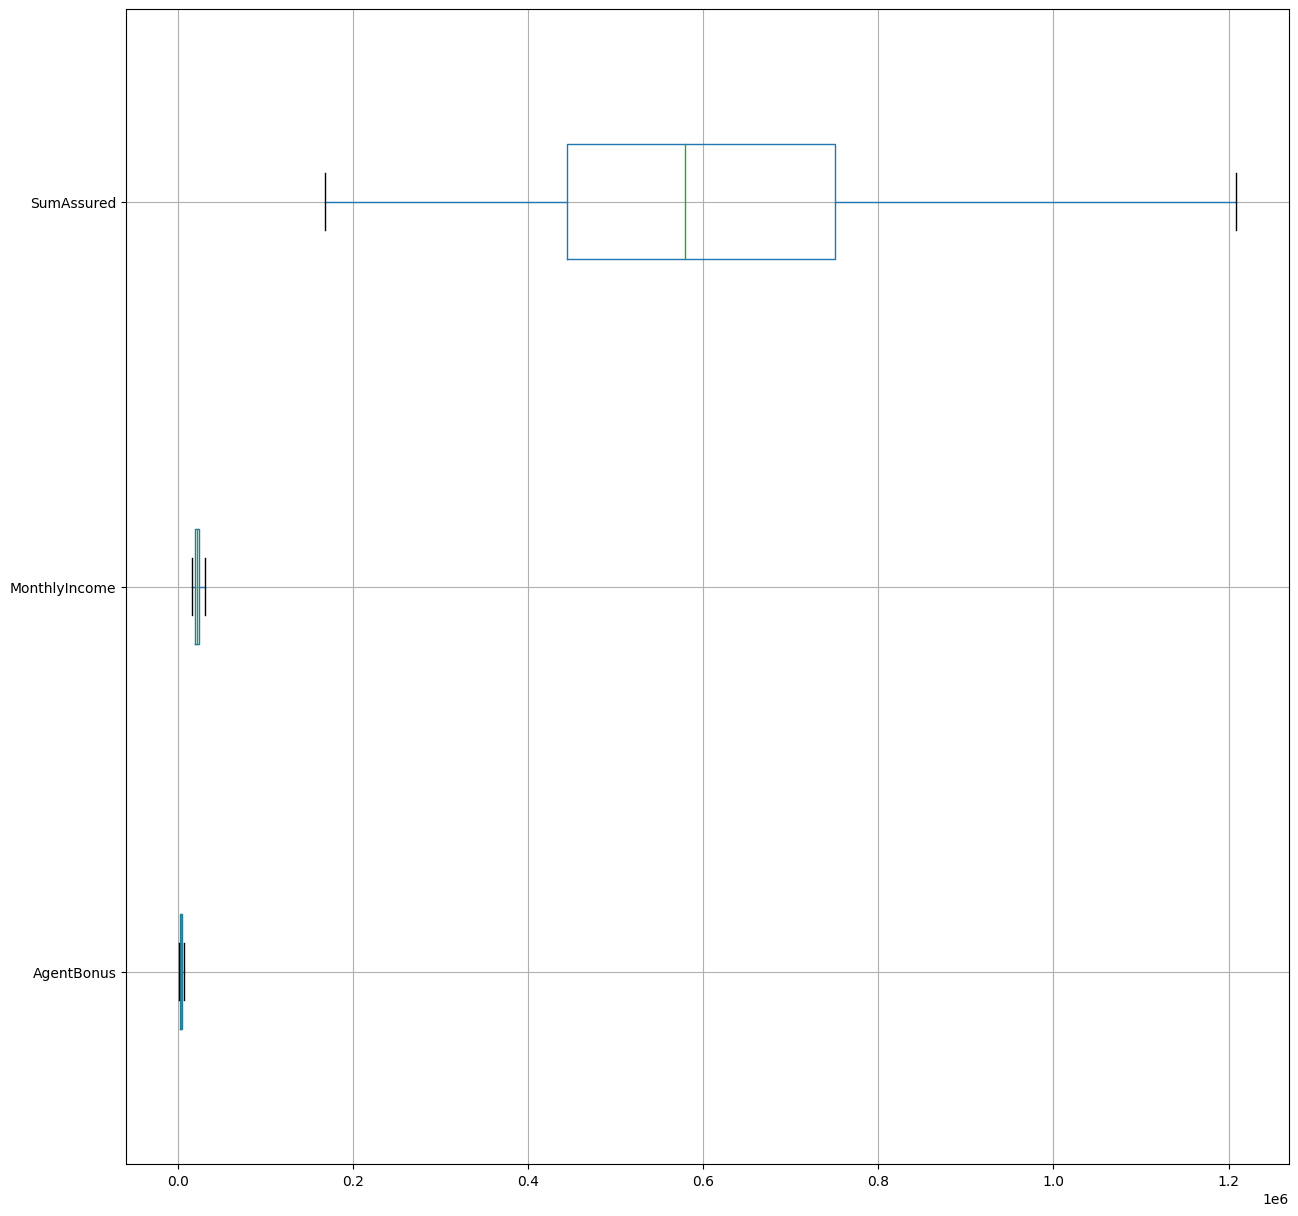

In [73]:
#after removing outliers
plt.figure(figsize=(15,15))
df[['AgentBonus', 'MonthlyIncome', 'SumAssured',]].boxplot(vert=0)

<AxesSubplot: xlabel='AgentBonus', ylabel='SumAssured'>

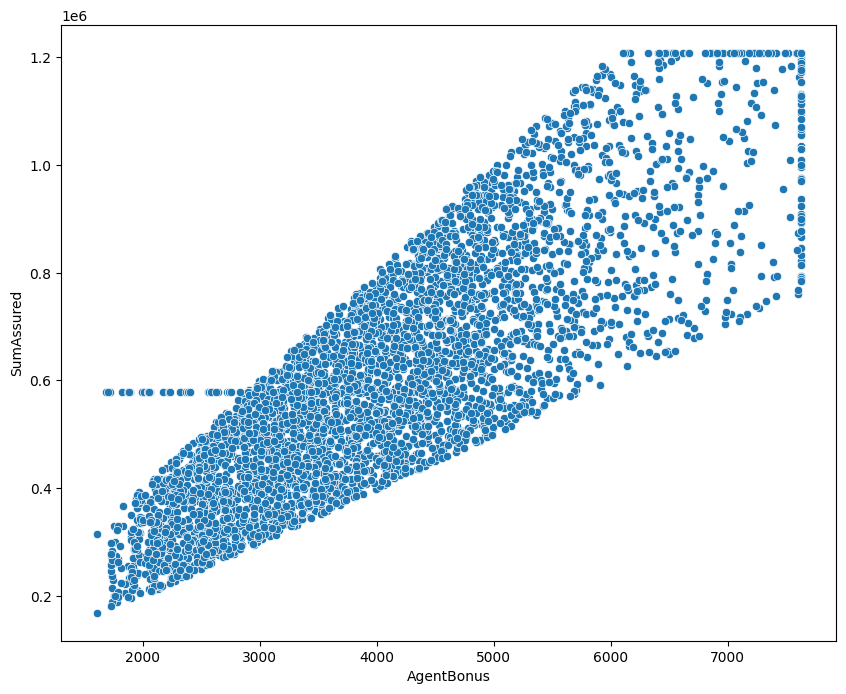

In [74]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['AgentBonus'],y=df['SumAssured'])

<AxesSubplot: xlabel='Age', ylabel='SumAssured'>

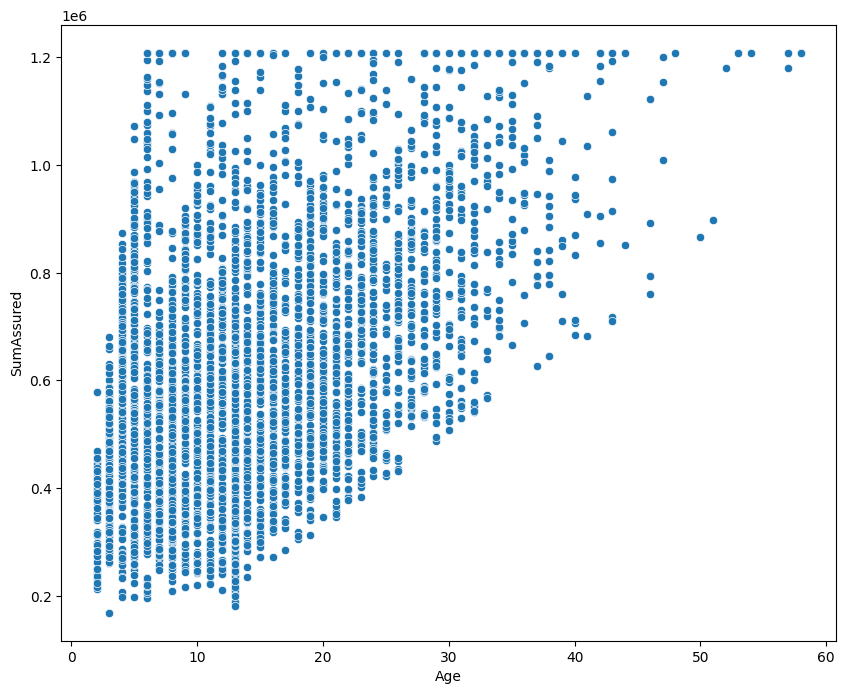

In [75]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Age'],y=df['SumAssured'])

<AxesSubplot: xlabel='MonthlyIncome', ylabel='SumAssured'>

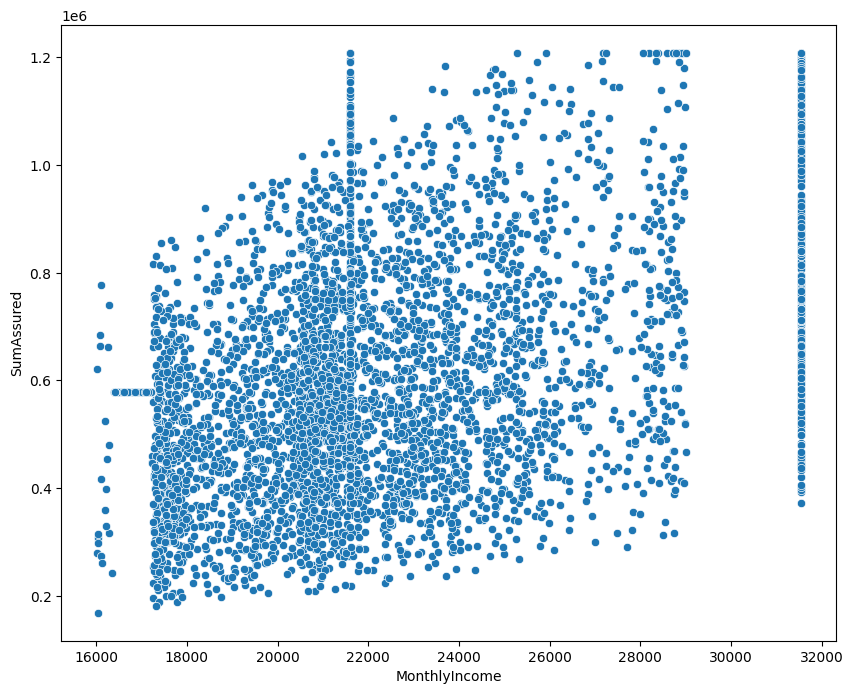

In [76]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['MonthlyIncome'],y=df['SumAssured'])

<AxesSubplot: xlabel='ExistingPolicyTenure', ylabel='AgentBonus'>

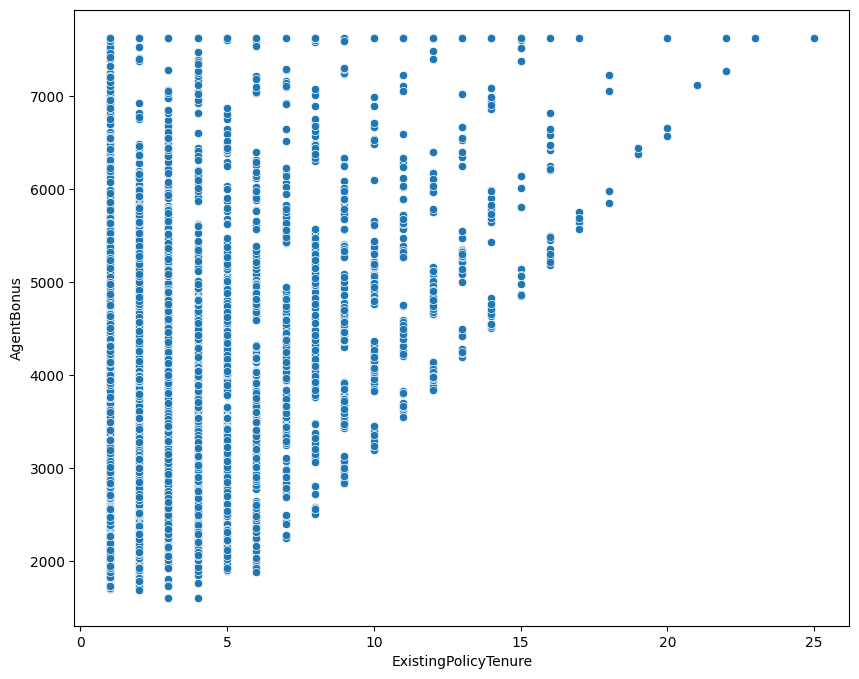

In [77]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['ExistingPolicyTenure'],y=df['AgentBonus'])

<AxesSubplot: xlabel='NumberOfPolicy', ylabel='AgentBonus'>

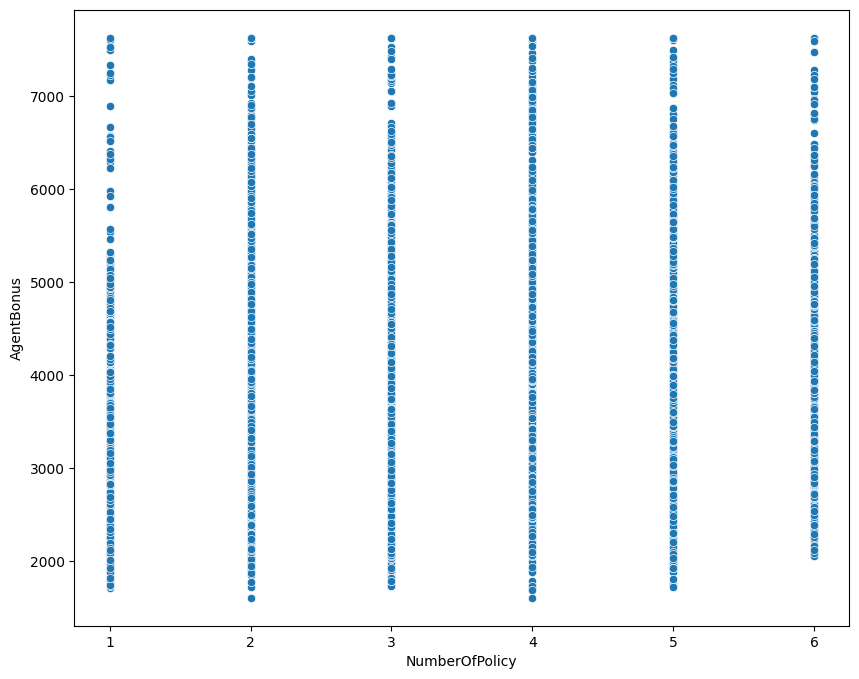

In [78]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['NumberOfPolicy'],y=df['AgentBonus'])